In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.preprocessing import LabelEncoder

In [2]:
enf = pd.read_csv('encoding_finished_v2.csv')
enf= enf.drop(columns =['Unnamed: 0'], axis=1) #필요없는 컬럼 삭제
enf.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag_Attrited Customer,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1.625,0.061,1,1,0,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,3.714,0.105,0,0,1,0,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,2.333,0.000,1,1,0,0,0,3,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,2.333,0.760,0,0,0,1,0,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,2.500,0.000,1,1,0,0,0,2,0,0


# 특성(x)과 타겟(y)분리

In [3]:
enf.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Attrition_Flag_Attrited Customer',
       'new_income_category', 'new_edu_category', 'new_card_category'],
      dtype='object')

In [4]:
y = enf['Attrition_Flag_Attrited Customer']
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag_Attrited Customer, Length: 10127, dtype: int64

In [5]:
x = enf[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category']]
x.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,42,1.625,0.061,1,1,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,33,3.714,0.105,0,0,1,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,20,2.333,0.000,1,1,0,0,3,3,0


In [6]:
x.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')

# train, test 분리

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
x_train.shape, x_test.shape

((7088, 21), (3039, 21))

In [9]:
x_test.shape[0]/(x_train.shape[0]+x_test.shape[0])

0.3000888713340575

# Normalizer 적용

In [10]:
from sklearn.preprocessing import Normalizer
norscaler = Normalizer()
nor_x_train = norscaler.fit_transform(x_train)
nor_x_test = norscaler.transform(x_test)

In [12]:
print("변환된 후 크기: {}".format(nor_x_train.shape))
#print("스케일 조정 전 특성별 최소값:\n {}".format(x_train.min(axis=0)))
#print("스케일 조정 전 특성별 최대값:\n {}".format(x_train.max(axis=0)))
print("스케일 조정 후 x_train 특성별 최소값:\n {}".format(nor_x_train.min(axis=0)))
print("스케일 조정 후 x_train 특성별 최대값:\n {}".format(nor_x_train.max(axis=0)))
print("스케일 조정 후 x_test 특성별 최소값:\n{}".format(nor_x_test.min(axis=0)))
print("스케일 조정 후 x_test특성별 최대값:\n{}".format(nor_x_test.max(axis=0)))

변환된 후 크기: (7088, 21)
스케일 조정 후 x_train 특성별 최소값:
 [5.37451433e-04 0.00000000e+00 2.74320211e-04 1.96787273e-05
 0.00000000e+00 0.00000000e+00 1.90797208e-01 0.00000000e+00
 8.02389758e-04 0.00000000e+00 1.76685790e-02 2.48561487e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
스케일 조정 후 x_train 특성별 최대값:
 [3.50969852e-02 2.28062045e-03 2.68388711e-02 2.72457304e-03
 2.32030767e-03 1.98770717e-03 8.09451830e-01 6.69352175e-01
 7.06949607e-01 8.64829120e-04 9.71737367e-01 2.65676591e-02
 1.33376099e-03 4.25779188e-04 5.20896540e-04 5.25531854e-04
 4.91531998e-04 4.59890292e-04 2.43534092e-03 2.96790730e-03
 1.83372076e-04]
스케일 조정 후 x_test 특성별 최소값:
[6.22783451e-04 0.00000000e+00 3.54509703e-04 1.97558225e-05
 0.00000000e+00 0.00000000e+00 1.91334065e-01 0.00000000e+00
 3.60806348e-03 0.00000000e+00 1.32773726e-02 2.60683632e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e

In [13]:
np.min(nor_x_train), np.max(nor_x_train)

(0.0, 0.9717373666168952)

In [14]:
np.min(nor_x_test), np.max(nor_x_test)

(0.0, 0.964480745047639)

# 1. 로지스틱 회귀

In [15]:
from sklearn.linear_model import LogisticRegression

lgr =LogisticRegression()
lgr.fit(nor_x_train, y_train)
lgr_ypred = lgr.predict(nor_x_test)
lgr_yproba = lgr.predict_proba(nor_x_test)

In [16]:
print('             분류 보고서')
print(classification_report(y_test, lgr_ypred))
print('정확도: ',accuracy_score(y_test, lgr_ypred))
print('재현율: ',recall_score(y_test, lgr_ypred))
print('정밀도: ',precision_score(y_test, lgr_ypred))
print('f1점수: ',f1_score(y_test, lgr_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, lgr_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2543
           1       0.00      0.00      0.00       496

    accuracy                           0.84      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.70      0.84      0.76      3039

정확도:  0.836788417242514
재현율:  0.0
정밀도:  0.0
f1점수:  0.0
ROC-AUC점수:  0.5


# 2.KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier=KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(nor_x_train, y_train)
knn_ypred = knn_classifier.predict(nor_x_test)
knn_yproba = knn_classifier.predict_proba(nor_x_test)

In [23]:
print('             분류 보고서')
print(classification_report(y_test, knn_ypred)) 
print('정확도: ',accuracy_score(y_test, knn_ypred))
print('재현율: ',recall_score(y_test, knn_ypred))
print('정밀도: ',precision_score(y_test, knn_ypred))
print('f1점수: ',f1_score(y_test, knn_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, knn_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2543
           1       0.67      0.32      0.44       496

    accuracy                           0.86      3039
   macro avg       0.77      0.65      0.68      3039
weighted avg       0.85      0.86      0.84      3039

정확도:  0.8634419216847647
재현율:  0.3245967741935484
정밀도:  0.6680497925311203
f1점수:  0.4369063772048847
ROC-AUC점수:  0.6465689336952799


In [19]:
import matplotlib.pyplot as plt

k_list = range(1,20)
acc = [] #정확도를 저장할 리스트 초기화

for k in k_list:
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(nor_x_train, y_train)
  acc.append(knn_classifier.score(nor_x_test, y_test))#계산된 정확도를 차례로 저장

In [20]:
acc[:10]

[0.84106614017769,
 0.8591641987495887,
 0.8621256992431721,
 0.8594932543599868,
 0.8624547548535703,
 0.859822309970385,
 0.8634419216847647,
 0.8558736426456071,
 0.8571898650871997,
 0.8548864758144127]

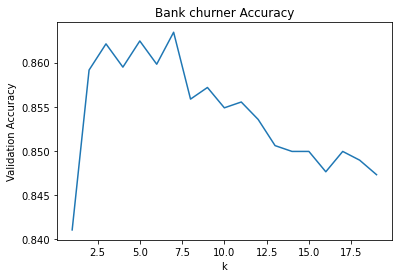

In [21]:
plt.plot(k_list, acc)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Bank churner Accuracy")
plt.show()

# 3.랜덤포레스트

In [24]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators=500, max_depth=4,random_state=0) 
rt.fit(nor_x_train, y_train)
rt_ypred=rt.predict(nor_x_test)
rt_yproba=rt.predict_proba(nor_x_test)

In [25]:
print('             분류 보고서')
print(classification_report(y_test, rt_ypred))
print('정확도: ',accuracy_score(y_test, rt_ypred))
print('재현율: ',recall_score(y_test, rt_ypred))
print('정밀도: ',precision_score(y_test, rt_ypred))
print('f1점수: ',f1_score(y_test, rt_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, rt_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2543
           1       0.82      0.18      0.29       496

    accuracy                           0.86      3039
   macro avg       0.84      0.58      0.61      3039
weighted avg       0.85      0.86      0.82      3039

정확도:  0.8594932543599868
재현율:  0.1774193548387097
정밀도:  0.822429906542056
f1점수:  0.2918739635157546
ROC-AUC점수:  0.5849739322365


In [26]:
columns = x_train.columns

# 특성 중요도  # columns = iris.feature_names임을 상기하라
feature_importance = pd.DataFrame(rt.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.080112,0.017552,0.052377,0.020413,0.064618,0.075493,0.059551,0.198679,0.109077,0.015769,...,0.032256,0.027424,0.118253,0.007719,0.009183,0.041771,0.001181,0.001848,0.008772,0.000068


In [27]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Revolving_Bal,0.198679
Avg_Utilization_Ratio,0.118253
Avg_Open_To_Buy,0.109077
Customer_Age,0.080112
Contacts_Count_12_mon,0.075493


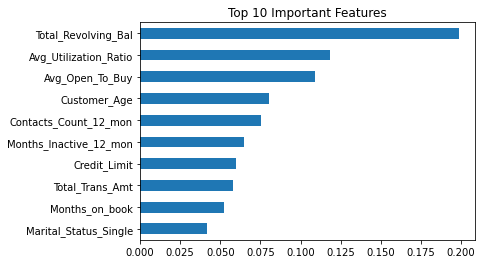

In [28]:
feat_importances = pd.Series(rt.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 4.서포트 벡터 머신

In [29]:
from sklearn.svm import SVC

svc = SVC(C = 1.0, kernel = 'rbf', probability=True)
svc.fit(nor_x_train, y_train)
svc_ypred=svc.predict(nor_x_test)
svc_yproba=svc.predict_proba(nor_x_test)

In [30]:
print('             분류 보고서')
print(classification_report(y_test, svc_ypred))
print('정확도: ',accuracy_score(y_test, svc_ypred))
print('재현율: ',recall_score(y_test, svc_ypred))
print('정밀도: ',precision_score(y_test, svc_ypred))
print('f1점수: ',f1_score(y_test, svc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, svc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2543
           1       0.00      0.00      0.00       496

    accuracy                           0.84      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.70      0.84      0.76      3039

정확도:  0.836788417242514
재현율:  0.0
정밀도:  0.0
f1점수:  0.0
ROC-AUC점수:  0.5


# 5.나이브 베이즈

In [31]:
# 가우시안 나이브 베이즈
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(nor_x_train, y_train)
gnb_ypred=gnb.predict(nor_x_test)
gnb_yproba=gnb.predict_proba(nor_x_test)

In [32]:
print('             분류 보고서')
print(classification_report(y_test, gnb_ypred))
print('정확도: ',accuracy_score(y_test, gnb_ypred))
print('재현율: ',recall_score(y_test, gnb_ypred))
print('정밀도: ',precision_score(y_test, gnb_ypred))
print('f1점수: ',f1_score(y_test, gnb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, gnb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2543
           1       0.36      0.33      0.35       496

    accuracy                           0.80      3039
   macro avg       0.62      0.61      0.61      3039
weighted avg       0.79      0.80      0.79      3039

정확도:  0.7959855215531425
재현율:  0.33064516129032256
정밀도:  0.36283185840707965
f1점수:  0.34599156118143454
ROC-AUC점수:  0.6086965483997817


In [33]:
# 다항분포 나이브 베이즈
from sklearn.naive_bayes import MultinomialNB

Mnb = MultinomialNB()
Mnb.fit(nor_x_train, y_train)
mnb_ypred=Mnb.predict(nor_x_test)
mnb_yproba=Mnb.predict_proba(nor_x_test)

In [34]:
print('             분류 보고서')
print(classification_report(y_test, mnb_ypred))
print('정확도: ',accuracy_score(y_test, mnb_ypred))
print('재현율: ',recall_score(y_test, mnb_ypred))
print('정밀도: ',precision_score(y_test, mnb_ypred))
print('f1점수: ',f1_score(y_test, mnb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, mnb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2543
           1       0.00      0.00      0.00       496

    accuracy                           0.84      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.70      0.84      0.76      3039

정확도:  0.836788417242514
재현율:  0.0
정밀도:  0.0
f1점수:  0.0
ROC-AUC점수:  0.5


# 6.신경망 MLP 분류

In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'adam', hidden_layer_sizes = (4, 4), learning_rate_init = 0.1)
mlp.fit(nor_x_train, y_train)
mlp_ypred = mlp.predict(nor_x_test)
mlp_yproba=mlp.predict_proba(nor_x_test)

In [36]:
print('             분류 보고서')
print(classification_report(y_test, mlp_ypred))
print('정확도: ',accuracy_score(y_test, mlp_ypred))
print('재현율: ',recall_score(y_test, mlp_ypred))
print('정밀도: ',precision_score(y_test, mlp_ypred))
print('f1점수: ',f1_score(y_test, mlp_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, mlp_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2543
           1       0.62      0.16      0.26       496

    accuracy                           0.85      3039
   macro avg       0.74      0.57      0.59      3039
weighted avg       0.82      0.85      0.81      3039

정확도:  0.8469891411648569
재현율:  0.16330645161290322
정밀도:  0.6183206106870229
f1점수:  0.25837320574162675
ROC-AUC점수:  0.5718223174305177


# 7.Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0,learning_rate=0.5)
gbc.fit(nor_x_train,y_train)
gbc_ypred=gbc.predict(nor_x_test)
gbc_yproba=gbc.predict_proba(nor_x_test)

In [38]:
print('             분류 보고서')
print(classification_report(y_test,gbc_ypred))
print('정확도: ',accuracy_score(y_test, gbc_ypred))
print('재현율: ',recall_score(y_test, gbc_ypred))
print('정밀도: ',precision_score(y_test, gbc_ypred))
print('f1점수: ',f1_score(y_test, gbc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, gbc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2543
           1       0.81      0.62      0.70       496

    accuracy                           0.91      3039
   macro avg       0.87      0.79      0.83      3039
weighted avg       0.91      0.91      0.91      3039

정확도:  0.914116485686081
재현율:  0.6169354838709677
정밀도:  0.8116710875331565
f1점수:  0.7010309278350516
ROC-AUC점수:  0.7945078520416577


In [39]:
columns = x_train.columns

feature_importance = pd.DataFrame(gbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.097376,0.006192,0.013663,0.073372,0.076198,0.064498,0.034202,0.149878,0.050247,0.026955,...,0.115164,0.07754,0.011456,0.022295,0.019747,0.03158,0.006281,0.008487,0.004287,0.000332


In [40]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Revolving_Bal,0.149878
Total_Trans_Ct,0.115164
Total_Trans_Amt,0.110248
Customer_Age,0.097376
Total_Ct_Chng_Q4_Q1,0.077540


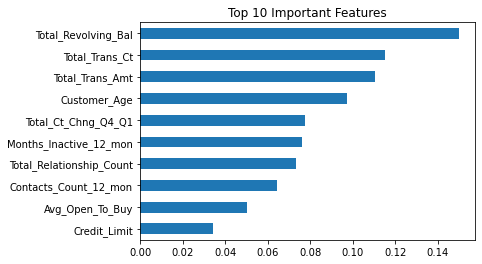

In [41]:
feat_importances = pd.Series(gbc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 8.XGBoost classifier

In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, learning_rate=1.0, max_depth =4)
xgb.fit(nor_x_train, y_train)
xgb_ypred = xgb.predict(nor_x_test)
xgb_yproba = xgb.predict_proba(nor_x_test)

[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
print('             분류 보고서')
print(classification_report(y_test, xgb_ypred))
print('정확도: ',accuracy_score(y_test, xgb_ypred)) 
print('재현율: ',recall_score(y_test,  xgb_ypred))
print('정밀도: ',precision_score(y_test,  xgb_ypred))
print('f1점수: ',f1_score(y_test,  xgb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, xgb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2543
           1       0.84      0.70      0.76       496

    accuracy                           0.93      3039
   macro avg       0.89      0.84      0.86      3039
weighted avg       0.93      0.93      0.93      3039

정확도:  0.9295820993747943
재현율:  0.7016129032258065
정밀도:  0.8405797101449275
f1점수:  0.7648351648351648
ROC-AUC점수:  0.8378296525566705


In [44]:
columns = x_train.columns

feature_importance = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.08084,0.015818,0.024,0.051247,0.065951,0.060482,0.050615,0.149741,0.019956,0.029626,...,0.079652,0.053554,0.016713,0.023992,0.016033,0.055986,0.088337,0.016003,0.014955,0.030427


In [45]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Revolving_Bal,0.149741
Marital_Status_Unknown,0.088337
Customer_Age,0.080840
Total_Trans_Ct,0.079652
Months_Inactive_12_mon,0.065951


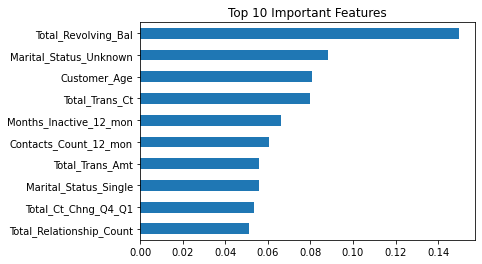

In [46]:
feat_importances = pd.Series(xgb.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 9.LightGBM

In [47]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(nor_x_train, y_train)
lgbm_ypred = lgbm.predict(nor_x_test)
lgbm_yproba = lgbm.predict_proba(nor_x_test)

In [48]:
print('             분류 보고서')
print(classification_report(y_test, lgbm_ypred))
print('정확도: ',accuracy_score(y_test, lgbm_ypred)) 
print('재현율: ',recall_score(y_test,  lgbm_ypred))
print('정밀도: ',precision_score(y_test,  lgbm_ypred))
print('f1점수: ',f1_score(y_test,  lgbm_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, lgbm_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2543
           1       0.89      0.72      0.79       496

    accuracy                           0.94      3039
   macro avg       0.92      0.85      0.88      3039
weighted avg       0.94      0.94      0.94      3039

정확도:  0.9391247120763409
재현율:  0.719758064516129
정밀도:  0.8858560794044665
f1점수:  0.7942157953281423
ROC-AUC점수:  0.8508345965522053


In [49]:
columns = x_train.columns
feature_importance = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,721,490,555,842,738,635,708,432,452,937,...,1302,901,304,312,370,326,76,353,436,73


In [50]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,1302
Total_Trans_Amt,1037
Total_Amt_Chng_Q4_Q1,937
Total_Ct_Chng_Q4_Q1,901
Total_Relationship_Count,842


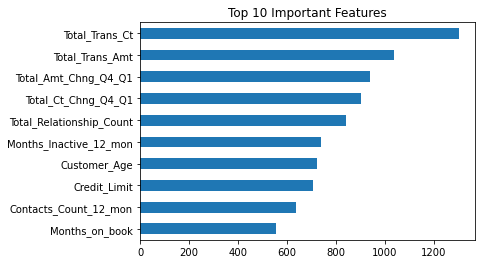

In [51]:
feat_importances = pd.Series(lgbm.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 10.catboost

In [52]:
from catboost import CatBoostClassifier, Pool

cbc = CatBoostClassifier()
cbc.fit(nor_x_train, y_train)
cbc_ypred = cbc.predict(nor_x_test)
cbc_yproba = cbc.predict_proba(nor_x_test)

Learning rate set to 0.023774
0:	learn: 0.6702721	total: 157ms	remaining: 2m 36s
1:	learn: 0.6481310	total: 180ms	remaining: 1m 29s
2:	learn: 0.6267161	total: 196ms	remaining: 1m 5s
3:	learn: 0.6082442	total: 208ms	remaining: 51.7s
4:	learn: 0.5907204	total: 226ms	remaining: 45s
5:	learn: 0.5756620	total: 242ms	remaining: 40.1s
6:	learn: 0.5602544	total: 254ms	remaining: 36s
7:	learn: 0.5466583	total: 267ms	remaining: 33.1s
8:	learn: 0.5334097	total: 277ms	remaining: 30.5s
9:	learn: 0.5197210	total: 288ms	remaining: 28.5s
10:	learn: 0.5059421	total: 301ms	remaining: 27.1s
11:	learn: 0.4959971	total: 313ms	remaining: 25.8s
12:	learn: 0.4860179	total: 325ms	remaining: 24.7s
13:	learn: 0.4757303	total: 341ms	remaining: 24s
14:	learn: 0.4655738	total: 352ms	remaining: 23.1s
15:	learn: 0.4564601	total: 363ms	remaining: 22.3s
16:	learn: 0.4488423	total: 384ms	remaining: 22.2s
17:	learn: 0.4420517	total: 407ms	remaining: 22.2s
18:	learn: 0.4349434	total: 434ms	remaining: 22.4s
19:	learn: 0.42

175:	learn: 0.2174554	total: 2.52s	remaining: 11.8s
176:	learn: 0.2168546	total: 2.53s	remaining: 11.8s
177:	learn: 0.2164270	total: 2.54s	remaining: 11.7s
178:	learn: 0.2160559	total: 2.55s	remaining: 11.7s
179:	learn: 0.2155784	total: 2.56s	remaining: 11.6s
180:	learn: 0.2151576	total: 2.57s	remaining: 11.6s
181:	learn: 0.2149268	total: 2.58s	remaining: 11.6s
182:	learn: 0.2143642	total: 2.58s	remaining: 11.5s
183:	learn: 0.2140853	total: 2.6s	remaining: 11.5s
184:	learn: 0.2136198	total: 2.61s	remaining: 11.5s
185:	learn: 0.2132150	total: 2.62s	remaining: 11.5s
186:	learn: 0.2125462	total: 2.63s	remaining: 11.4s
187:	learn: 0.2122957	total: 2.64s	remaining: 11.4s
188:	learn: 0.2117597	total: 2.65s	remaining: 11.4s
189:	learn: 0.2112575	total: 2.66s	remaining: 11.4s
190:	learn: 0.2107033	total: 2.68s	remaining: 11.3s
191:	learn: 0.2100486	total: 2.69s	remaining: 11.3s
192:	learn: 0.2095547	total: 2.7s	remaining: 11.3s
193:	learn: 0.2092716	total: 2.71s	remaining: 11.3s
194:	learn: 0.

342:	learn: 0.1620061	total: 4.49s	remaining: 8.6s
343:	learn: 0.1618195	total: 4.5s	remaining: 8.59s
344:	learn: 0.1615645	total: 4.52s	remaining: 8.57s
345:	learn: 0.1613712	total: 4.53s	remaining: 8.56s
346:	learn: 0.1611146	total: 4.54s	remaining: 8.54s
347:	learn: 0.1609558	total: 4.54s	remaining: 8.52s
348:	learn: 0.1606536	total: 4.55s	remaining: 8.49s
349:	learn: 0.1603837	total: 4.56s	remaining: 8.47s
350:	learn: 0.1602265	total: 4.57s	remaining: 8.45s
351:	learn: 0.1600272	total: 4.58s	remaining: 8.43s
352:	learn: 0.1598153	total: 4.59s	remaining: 8.41s
353:	learn: 0.1595530	total: 4.6s	remaining: 8.39s
354:	learn: 0.1592415	total: 4.61s	remaining: 8.37s
355:	learn: 0.1591211	total: 4.62s	remaining: 8.35s
356:	learn: 0.1587836	total: 4.63s	remaining: 8.33s
357:	learn: 0.1586370	total: 4.63s	remaining: 8.31s
358:	learn: 0.1584090	total: 4.64s	remaining: 8.29s
359:	learn: 0.1582679	total: 4.65s	remaining: 8.27s
360:	learn: 0.1579050	total: 4.66s	remaining: 8.25s
361:	learn: 0.1

515:	learn: 0.1249314	total: 6.28s	remaining: 5.89s
516:	learn: 0.1248152	total: 6.29s	remaining: 5.88s
517:	learn: 0.1247117	total: 6.3s	remaining: 5.86s
518:	learn: 0.1245870	total: 6.31s	remaining: 5.85s
519:	learn: 0.1243508	total: 6.32s	remaining: 5.83s
520:	learn: 0.1241790	total: 6.33s	remaining: 5.82s
521:	learn: 0.1239552	total: 6.34s	remaining: 5.8s
522:	learn: 0.1238458	total: 6.35s	remaining: 5.79s
523:	learn: 0.1237397	total: 6.36s	remaining: 5.78s
524:	learn: 0.1235373	total: 6.37s	remaining: 5.76s
525:	learn: 0.1233875	total: 6.37s	remaining: 5.74s
526:	learn: 0.1232768	total: 6.38s	remaining: 5.73s
527:	learn: 0.1230896	total: 6.39s	remaining: 5.71s
528:	learn: 0.1229265	total: 6.4s	remaining: 5.7s
529:	learn: 0.1227424	total: 6.41s	remaining: 5.68s
530:	learn: 0.1224774	total: 6.42s	remaining: 5.67s
531:	learn: 0.1223099	total: 6.43s	remaining: 5.66s
532:	learn: 0.1220957	total: 6.44s	remaining: 5.64s
533:	learn: 0.1219588	total: 6.45s	remaining: 5.63s
534:	learn: 0.12

687:	learn: 0.0982667	total: 8.05s	remaining: 3.65s
688:	learn: 0.0981640	total: 8.07s	remaining: 3.64s
689:	learn: 0.0980930	total: 8.08s	remaining: 3.63s
690:	learn: 0.0979387	total: 8.09s	remaining: 3.62s
691:	learn: 0.0978143	total: 8.1s	remaining: 3.6s
692:	learn: 0.0975935	total: 8.11s	remaining: 3.59s
693:	learn: 0.0974640	total: 8.12s	remaining: 3.58s
694:	learn: 0.0972990	total: 8.13s	remaining: 3.57s
695:	learn: 0.0972305	total: 8.14s	remaining: 3.55s
696:	learn: 0.0970577	total: 8.15s	remaining: 3.54s
697:	learn: 0.0969738	total: 8.15s	remaining: 3.53s
698:	learn: 0.0968797	total: 8.16s	remaining: 3.52s
699:	learn: 0.0967607	total: 8.17s	remaining: 3.5s
700:	learn: 0.0966601	total: 8.18s	remaining: 3.49s
701:	learn: 0.0965192	total: 8.19s	remaining: 3.48s
702:	learn: 0.0963409	total: 8.2s	remaining: 3.46s
703:	learn: 0.0962646	total: 8.21s	remaining: 3.45s
704:	learn: 0.0960853	total: 8.22s	remaining: 3.44s
705:	learn: 0.0960255	total: 8.23s	remaining: 3.42s
706:	learn: 0.09

850:	learn: 0.0809526	total: 9.66s	remaining: 1.69s
851:	learn: 0.0808768	total: 9.68s	remaining: 1.68s
852:	learn: 0.0807999	total: 9.69s	remaining: 1.67s
853:	learn: 0.0807485	total: 9.7s	remaining: 1.66s
854:	learn: 0.0806655	total: 9.71s	remaining: 1.65s
855:	learn: 0.0805746	total: 9.72s	remaining: 1.64s
856:	learn: 0.0804702	total: 9.73s	remaining: 1.62s
857:	learn: 0.0803704	total: 9.74s	remaining: 1.61s
858:	learn: 0.0802661	total: 9.75s	remaining: 1.6s
859:	learn: 0.0801905	total: 9.76s	remaining: 1.59s
860:	learn: 0.0800583	total: 9.77s	remaining: 1.58s
861:	learn: 0.0799164	total: 9.77s	remaining: 1.56s
862:	learn: 0.0798780	total: 9.78s	remaining: 1.55s
863:	learn: 0.0797369	total: 9.79s	remaining: 1.54s
864:	learn: 0.0796596	total: 9.8s	remaining: 1.53s
865:	learn: 0.0796064	total: 9.81s	remaining: 1.52s
866:	learn: 0.0795381	total: 9.82s	remaining: 1.51s
867:	learn: 0.0794252	total: 9.83s	remaining: 1.5s
868:	learn: 0.0793055	total: 9.84s	remaining: 1.48s
869:	learn: 0.07

In [53]:
print('             분류 보고서')
print(classification_report(y_test, cbc_ypred))
print('정확도: ',accuracy_score(y_test, cbc_ypred)) 
print('재현율: ',recall_score(y_test,  cbc_ypred))
print('정밀도: ',precision_score(y_test,  cbc_ypred))
print('f1점수: ',f1_score(y_test,  cbc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, cbc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2543
           1       0.90      0.67      0.77       496

    accuracy                           0.93      3039
   macro avg       0.92      0.83      0.86      3039
weighted avg       0.93      0.93      0.93      3039

정확도:  0.9335307666995722
재현율:  0.6653225806451613
정밀도:  0.9016393442622951
f1점수:  0.765661252900232
ROC-AUC점수:  0.8255830362919082


In [54]:
columns = x_train.columns
feature_importance = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,7.283733,1.979919,3.5774,6.13436,8.222426,6.423121,6.267579,4.358799,4.663883,6.223907,...,19.218165,5.88649,2.848732,1.793977,1.418306,2.119902,0.13207,0.759824,0.780307,0.10325


In [55]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,19.218165
Total_Trans_Amt,9.803849
Months_Inactive_12_mon,8.222426
Customer_Age,7.283733
Contacts_Count_12_mon,6.423121


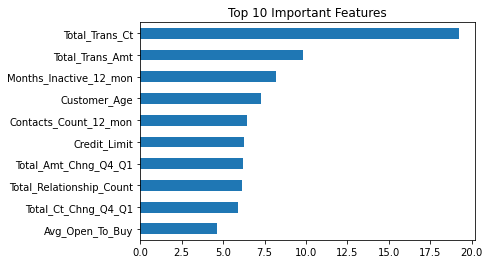

In [56]:
feat_importances = pd.Series(cbc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 각 모델별 점수 비교

In [57]:
Comparison = pd.DataFrame({'LogReg':[accuracy_score(y_test, lgr_ypred),recall_score(y_test,  lgr_ypred),precision_score(y_test,  lgr_ypred),f1_score(y_test,  lgr_ypred),roc_auc_score(y_test, lgr_ypred)],
'KNN':[accuracy_score(y_test, knn_ypred),recall_score(y_test,  knn_ypred),precision_score(y_test,  knn_ypred),f1_score(y_test,  knn_ypred),roc_auc_score(y_test, knn_ypred)],
'RandFor':[accuracy_score(y_test, rt_ypred),recall_score(y_test,  rt_ypred),precision_score(y_test,  rt_ypred),f1_score(y_test,  rt_ypred),roc_auc_score(y_test, rt_ypred)],    
'SVM':[accuracy_score(y_test, svc_ypred),recall_score(y_test,  svc_ypred),precision_score(y_test,  svc_ypred),f1_score(y_test,  svc_ypred),roc_auc_score(y_test, svc_ypred)],
'GNB':[accuracy_score(y_test, gnb_ypred),recall_score(y_test,  gnb_ypred),precision_score(y_test,  gnb_ypred),f1_score(y_test,  gnb_ypred),roc_auc_score(y_test, gnb_ypred)],
"MNB":[accuracy_score(y_test, mnb_ypred),recall_score(y_test,  mnb_ypred),precision_score(y_test,  mnb_ypred),f1_score(y_test,  mnb_ypred),roc_auc_score(y_test, mnb_ypred)],
"MLP":[accuracy_score(y_test, mlp_ypred),recall_score(y_test,  mlp_ypred),precision_score(y_test,  mlp_ypred),f1_score(y_test,  mlp_ypred),roc_auc_score(y_test, mlp_ypred)],
"GradBoost":[accuracy_score(y_test, gbc_ypred),recall_score(y_test,  gbc_ypred),precision_score(y_test,  gbc_ypred),f1_score(y_test,  gbc_ypred),roc_auc_score(y_test, gbc_ypred)],
"XGBoost":[accuracy_score(y_test, xgb_ypred),recall_score(y_test,  xgb_ypred),precision_score(y_test,  xgb_ypred),f1_score(y_test,  xgb_ypred),roc_auc_score(y_test, xgb_ypred)],
"LightGBM":[accuracy_score(y_test, lgbm_ypred),recall_score(y_test,  lgbm_ypred),precision_score(y_test,  lgbm_ypred),f1_score(y_test,  lgbm_ypred),roc_auc_score(y_test, lgbm_ypred)],
'CatBoost':[accuracy_score(y_test, cbc_ypred),recall_score(y_test,  cbc_ypred),precision_score(y_test,  cbc_ypred),f1_score(y_test,  cbc_ypred),roc_auc_score(y_test, cbc_ypred)]},
                          index = ['ACC', 'Recall', 'Precision', 'F1', 'ROC-AUC'])
Comparison

,LogReg,KNN,RandFor,SVM,GNB,MNB,MLP,GradBoost,XGBoost,LightGBM,CatBoost
ACC,0.836788,0.863442,0.859493,0.836788,0.795986,0.836788,0.846989,0.914116,0.929582,0.939125,0.933531
Recall,0.000000,0.324597,0.177419,0.000000,0.330645,0.000000,0.163306,0.616935,0.701613,0.719758,0.665323
Precision,0.000000,0.668050,0.822430,0.000000,0.362832,0.000000,0.618321,0.811671,0.840580,0.885856,0.901639
F1,0.000000,0.436906,0.291874,0.000000,0.345992,0.000000,0.258373,0.701031,0.764835,0.794216,0.765661
ROC-AUC,0.500000,0.646569,0.584974,0.500000,0.608697,0.500000,0.571822,0.794508,0.837830,0.850835,0.825583


In [58]:
Comparison.max(axis=1)

ACC          0.939125
Recall       0.719758
Precision    0.901639
F1           0.794216
ROC-AUC      0.850835
dtype: float64

In [59]:
result = Comparison.max(axis=1)
result.index = Comparison.idxmax(axis=1)
result.index

Index(['LightGBM', 'LightGBM', 'CatBoost', 'LightGBM', 'LightGBM'], dtype='object')

In [60]:
top4 = Comparison[['GradBoost', 'XGBoost', 'LightGBM', 'CatBoost']]
top4

,GradBoost,XGBoost,LightGBM,CatBoost
ACC,0.914116,0.929582,0.939125,0.933531
Recall,0.616935,0.701613,0.719758,0.665323
Precision,0.811671,0.840580,0.885856,0.901639
F1,0.701031,0.764835,0.794216,0.765661
ROC-AUC,0.794508,0.837830,0.850835,0.825583


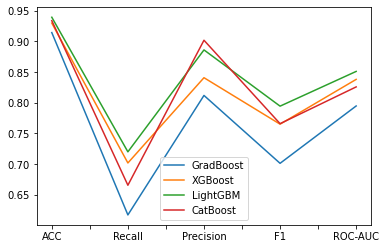

In [61]:
top4.plot()
plt.show()

# Top4 모델별 Feature importance 비교

In [62]:
# Gradient Boosting Classifier
grad_df = pd.DataFrame(gbc.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
grad_dft = grad_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
grad_dft

,feature_importance
Total_Revolving_Bal,0.149878
Total_Trans_Ct,0.115164
Total_Trans_Amt,0.110248
Customer_Age,0.097376
Total_Ct_Chng_Q4_Q1,0.077540


In [63]:
# XGbBoost
xgboost_df = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
xgboost_dft = xgboost_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
xgboost_dft

,feature_importance
Total_Revolving_Bal,0.149741
Marital_Status_Unknown,0.088337
Customer_Age,0.080840
Total_Trans_Ct,0.079652
Months_Inactive_12_mon,0.065951


In [64]:
# LightGBM
lightgbm_df = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
lightgbm_dft = lightgbm_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
lightgbm_dft

,feature_importance
Total_Trans_Ct,1302
Total_Trans_Amt,1037
Total_Amt_Chng_Q4_Q1,937
Total_Ct_Chng_Q4_Q1,901
Total_Relationship_Count,842


In [65]:
# CatBoost
cat_df = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
cat_dft = cat_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
cat_dft

,feature_importance
Total_Trans_Ct,19.218165
Total_Trans_Amt,9.803849
Months_Inactive_12_mon,8.222426
Customer_Age,7.283733
Contacts_Count_12_mon,6.423121


In [66]:
freq = pd.concat([grad_dft, xgboost_dft, lightgbm_dft, cat_dft])
freq

,feature_importance
Total_Revolving_Bal,0.149878
Total_Trans_Ct,0.115164
Total_Trans_Amt,0.110248
Customer_Age,0.097376
Total_Ct_Chng_Q4_Q1,0.077540
Total_Revolving_Bal,0.149741
Marital_Status_Unknown,0.088337
Customer_Age,0.080840
Total_Trans_Ct,0.079652
Months_Inactive_12_mon,0.065951


In [67]:
result = freq.max(axis=0)
result.index = freq.idxmax(axis=0)
result.index

Index(['Total_Trans_Ct'], dtype='object')